In [30]:
import os.path
import sys
import math
from statistics import *
import numpy as np
from matplotlib import pyplot as plt

import skimage.io as io

from skimage.measure import *
from skimage import *
from skimage.transform import probabilistic_hough_line
from skimage.feature import *
from skimage.morphology import *
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean, rotate
import skimage.filters as filters

from skimage.restoration import denoise_tv_chambolle, denoise_bilateral, denoise_wavelet, estimate_sigma
from skimage.filters import threshold_otsu, threshold_local

In [75]:
def load_images(path, n):
    images = []
    suffix = '.jpg'
    for i in range(1,n):
        filepath = os.path.join(path, 'img_' + str(i) + suffix)
        images.append(io.imread(filepath, as_gray=True))
    return images

In [76]:
images = load_images("data/", 30)

In [80]:
image  = images[7]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: As of scikit-image 0.16, automated rescaling of sigma to match any internal rescaling of the image is performed. Setting rescale_sigma to False, will disable this new behaviour. To avoid this warning the user should explicitly set rescale_sigma to True or False.
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Probabilistic Hough')

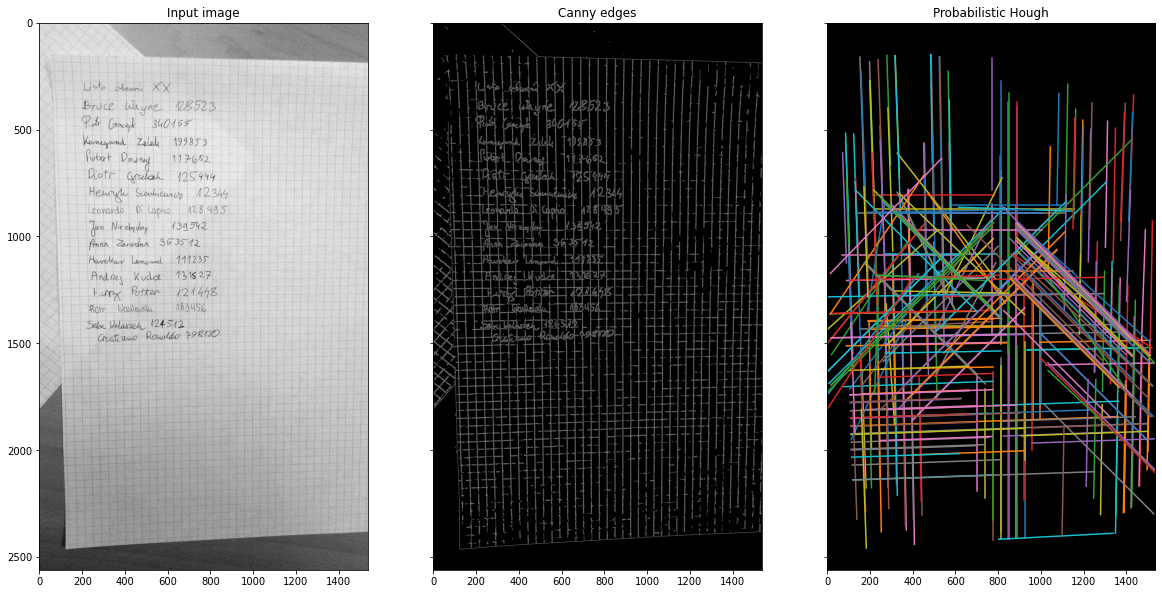

In [83]:
i = denoise_wavelet(image)

edges = canny(i)
lines = probabilistic_hough_line(edges, threshold=25, line_length=500, line_gap=35)

fig, axes = plt.subplots(1, 3, figsize=(20, 20), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(i, cmap=plt.cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=plt.cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

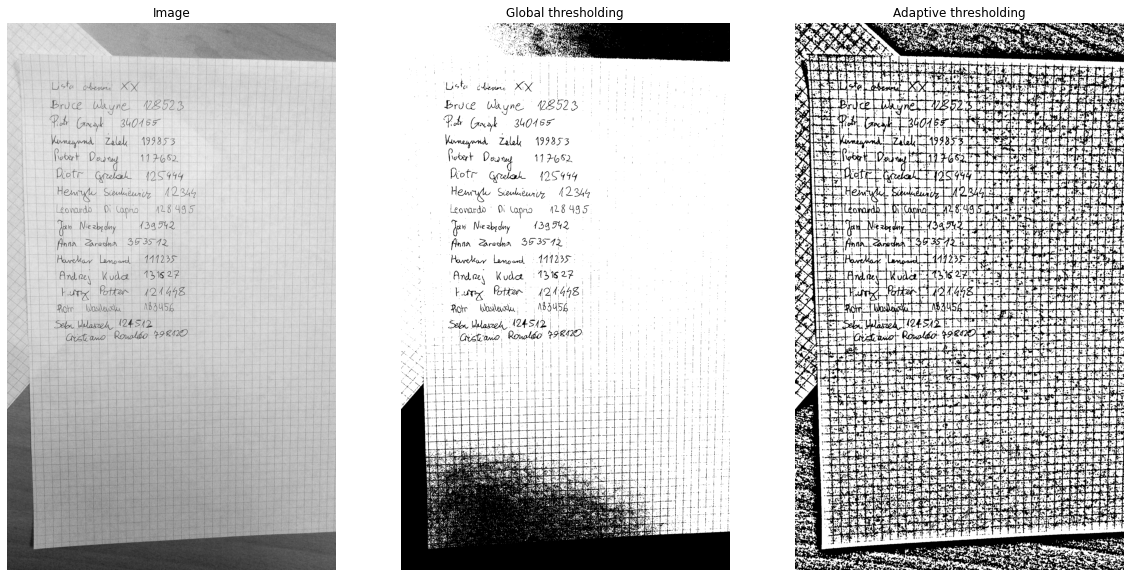

In [82]:
global_thresh = threshold_otsu(image)
binary_global = image > global_thresh

th = round(0.07 * min(image.shape))

block_size = th if th % 2 == 1 else th + 1
binary_adaptive = image > threshold_local(image, block_size)

fig, axes = plt.subplots(1, 3, figsize=(20, 20), sharex=True, sharey=True)
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Image')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(closing(opening(binary_adaptive, disk(1)), disk(1)))
ax[2].set_title('Adaptive thresholding')

for ax in axes:
    ax.axis('off')

plt.show()